Muhammad Azhar Maulana JCDS 0508

# **Business Problem**

Customer Lifetime Value (CLV) adalah jumlah uang yang dihabiskan oleh seorang pelanggan pada sebuah perusahaan selama hubungan bisnis antara pelanggan dan perusahaan tersebut. Secara sederhana, CLV adalah prediksi dari total pendapatan yang dapat diperoleh dari pelanggan. Memahami dan meningkatkan CLV dalam suatu perusahaan dapat meningkatkan keuntungan perusahaan, membantu perencanaan anggaran, serta menganalisis kepuasan pelanggan. Dalam penerapannya, metrik CLV banyak digunakan oleh perusahaan yang melakukan penjualan berulang kepada pelanggan (misalnya, makanan, produk rumah tangga) maupun perusahaan yang menggunakan sistem berlangganan dalam bisnis mereka (misalnya, asuransi, perusahaan telekomunikasi).


Dalam industri asuransi mobil yang sangat kompetitif, perusahaan seperti GEICO Car Insurance menghadapi tantangan besar untuk mempertahankan pelanggan bernilai tinggi dan mengelola sumber daya pemasaran secara efisien. Dengan meningkatnya biaya akuisisi pelanggan dan kebutuhan untuk mempertahankan loyalitas pelanggan di pasar yang dinamis, pemahaman mendalam tentang nilai pelanggan menjadi elemen kunci untuk mendorong pertumbuhan bisnis yang berkelanjutan.

Masalah bisnis utama yang dihadapi adalah:

1. Identifikasi Pelanggan Bernilai Tinggi:

- Bagaimana perusahaan dapat mengidentifikasi pelanggan yang memberikan nilai jangka panjang terbesar untuk bisnis?

- Bagaimana cara mengalokasikan sumber daya pemasaran secara strategis untuk pelanggan ini?

2.Pengelolaan Sumber Daya Pemasaran:

- Bagaimana perusahaan dapat mengoptimalkan kampanye pemasaran untuk meningkatkan loyalitas pelanggan bernilai tinggi tanpa mengabaikan segmen lainnya?

- Bagaimana mendesain program retensi yang disesuaikan berdasarkan potensi nilai pelanggan?

Tujuan proyek ini adalah: Mengembangkan model prediktif berbasis machine learning untuk menghitung Customer Lifetime Value (CLV) dari pelanggan asuransi mobil. Dengan hasil prediksi CLV, pelanggan dapat dikelompokkan ke dalam segmen yang relevan (High CLV, Medium CLV, Low CLV) untuk membantu perusahaan:

- Menargetkan pelanggan bernilai tinggi dengan kampanye pemasaran yang dipersonalisasi.
- Mengidentifikasi pelanggan berpotensi untuk ditingkatkan ke segmen yang lebih bernilai.
- Mengoptimalkan pengeluaran pemasaran dengan pendekatan berbasis data.



# **Metric Evaluation**

Dalam konteks prediksi Customer Lifetime Value (CLV) untuk GEICO Car Insurance, terdapat 3 metrik yang direkomendasikan sesuai dengan tujuan proyek: RMSE, MAE, dan MAPE.

**1. RMSE (Root Mean Squared Error):**

- Deskripsi: RMSE mengukur rata-rata besarnya kesalahan antara nilai CLV yang diprediksi dan aktual, dengan penekanan pada kesalahan yang lebih besar.

- Penerapan: Untuk GEICO Car Insurance, di mana prediksi CLV yang akurat sangat penting untuk perencanaan bisnis, RMSE memiliki nilai signifikan. Kesalahan besar dalam prediksi CLV dapat menyebabkan alokasi sumber daya yang tidak tepat atau hilangnya peluang untuk menjangkau pelanggan.

**2. MAE (Mean Absolute Error):**

- Deskripsi: MAE menghitung rata-rata selisih absolut antara nilai CLV yang diprediksi dan aktual, memberikan gambaran rata-rata kesalahan prediksi.

- Penerapan: MAE berguna untuk mengevaluasi akurasi rata-rata prediksi CLV untuk GEICO Car Insurance. Metrik ini memberikan pandangan yang seimbang tentang kinerja model tanpa memberikan penekanan berlebihan pada kesalahan besar, yang penting untuk memahami akurasi keseluruhan prediksi.


**3. MAPE (Mean Absolute Percentage Error):**

- Deskripsi: MAPE menghitung rata-rata persentase selisih antara nilai CLV yang diprediksi dan aktual, memberikan wawasan tentang kesalahan relatif.

- Penerapan: MAPE memberikan perspektif tentang akurasi proporsional prediksi CLV untuk GEICO Car Insurance. Metrik ini membantu mengevaluasi seberapa baik model memprediksi CLV relatif terhadap nilai aktual, yang berguna untuk memahami dampak kesalahan prediksi.

Menggunakan beberapa metrik sekaligus dapat memberikan pandangan yang lebih komprehensif tentang kinerja model. Meskipun RMSE, MAE, dan MAPE memberikan perspektif yang berbeda, kombinasi dari ketiganya dapat membantu evaluasi yang lebih mendalam.

# **Column Description**

| **Attribute** | **Description** |
| --- | --- |
| Vehicle Class | Tipe Mobil |
| Coverage | Types of vehicle insurance coverage |
| Renew Type Offer | Offer to renew policies that have been/will expire |
| EmploymentStatus | Status Pekerjaan Customer |
| Marital Status | Status Pernikahan Customer |
| Education | Tingkat Pendidikan |
| Number of Policies | Number of policies owned by the customer |
| Monthly Premium Auto | Monthly premium paid by the insured |
| Total Claim Amount | Cumulative number of claims since the beginning of the policy |
| Income | Income Customer (dollar) |
| Customer Lifetime Value | Customer Lifetime Value (Target) |

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', None)

In [74]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


# **Data Cleaning**

Data Cleaning perlu dilakukan, karena Missing values, Duplikat data, dan Outliers akan mempengaruhi performa dari model machine learning

In [75]:
rows, cols = df.shape
print(f'Dataset ini terdiri dari {rows} rows dan {cols} columns')

Dataset ini terdiri dari 5669 rows dan 11 columns


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


### Missing Values

In [77]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dataset tidak memiliki missing values

### Duplicate Data

In [78]:
df.duplicated().sum()

618

In [79]:
df.drop_duplicates(inplace=True)

Untuk menghandle duplikat data dengan cara langsung didrop atau dihapus dari dataset karena duplikat data akan mempengaruhi performa dari model machine learning, menyebabkan model lebih condong atau "berat" pada data yang berulang sehingga cenderung bias terhadap pola yang mungkin tidak benar-benar mewakili keseluruhan dataset.

### Outliers Data

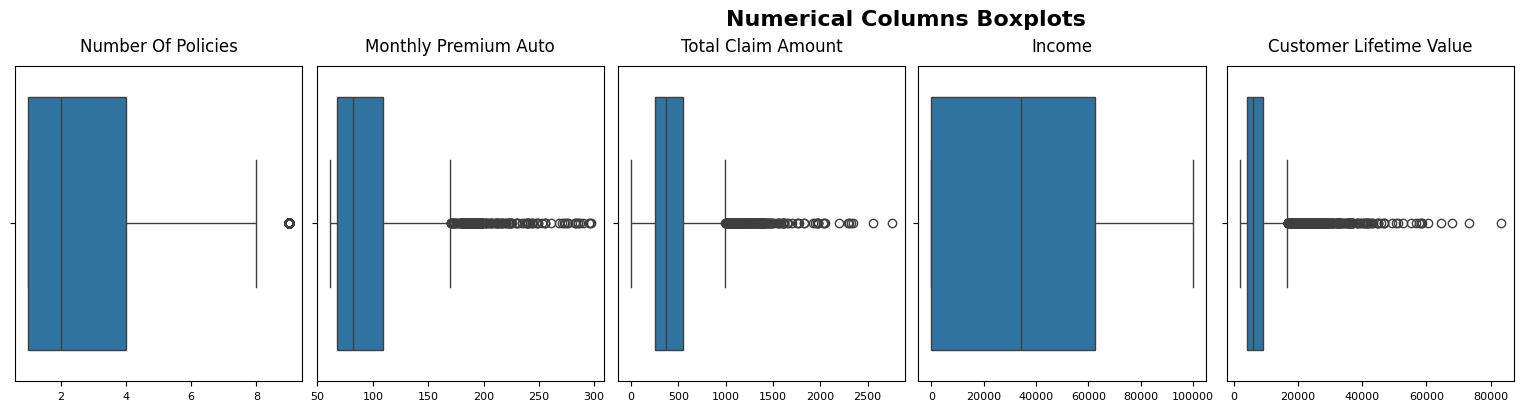

In [80]:
# Take numerical columns only
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 5))

fig, axes = plt.subplots(n_rows, 6, figsize=(18, 4 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column.title(), fontsize=12, pad=10)
    axes[i].set_xlabel('') 
    axes[i].set_ylabel('') 
    axes[i].tick_params(axis='both', labelsize=8) 

for j in range(n_plots, n_rows * 6):
    fig.delaxes(axes[j])

plt.suptitle('Numerical Columns Boxplots', fontsize=16, fontweight='bold')
plt.show()

In [81]:
def remove_outliers_iqr(data, k=1.5):
    data_cleaned = data.copy()
    
    for column in data.select_dtypes(include='number').columns:
        Q1 = data[column].quantile(0.25)  
        Q3 = data[column].quantile(0.75)  
        IQR = Q3 - Q1                     
        
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        data_cleaned = data_cleaned[
            (data_cleaned[column] >= lower_bound) & 
            (data_cleaned[column] <= upper_bound)
        ]
    
    return data_cleaned

df = remove_outliers_iqr(df, k=1.5)

Outlier dihandle dengan menghapus outlier berdasarkan upper bound dan lower bound pada masing-masing kolom. Menghandle outlier sangat penting karena kehadiran outlier dapat menggeser garis regresi, membuat prediksi tidak akurat.

In [82]:
df.shape

(4131, 11)

# **EDA**

## **Numerical Columns Data Distribution**

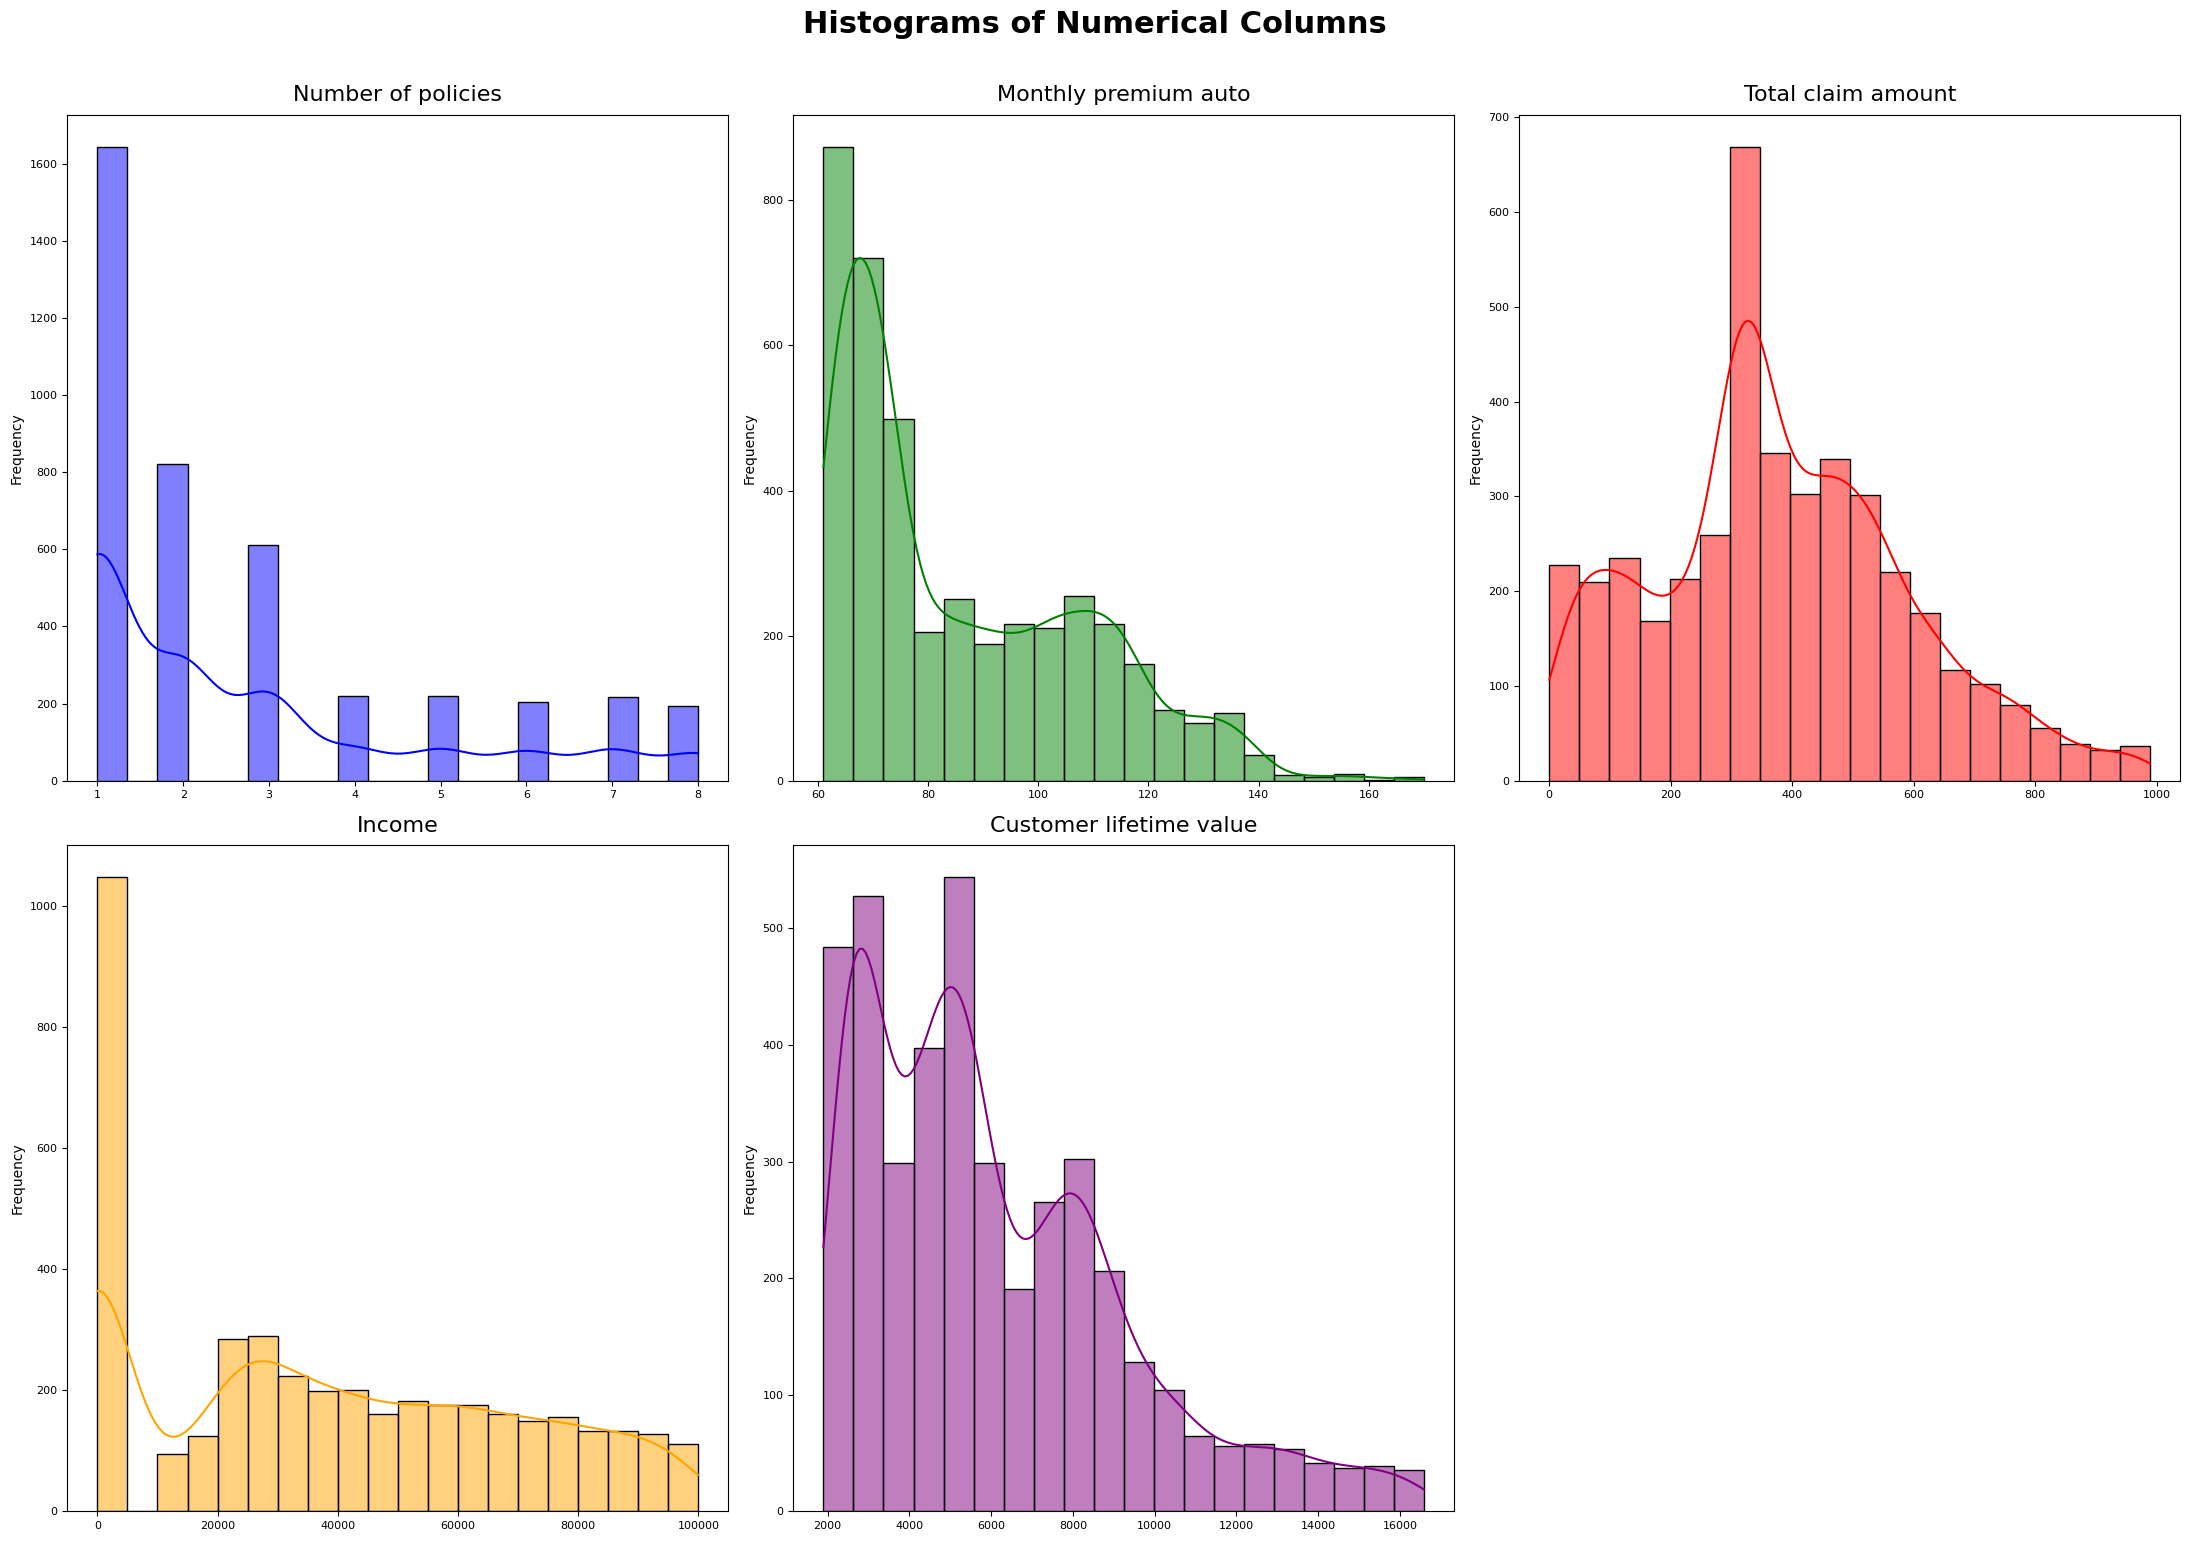

In [83]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(22, 8 * n_rows))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'brown']


for i, column in enumerate(numeric_columns):
    color_index = i % len(colors)
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i], color=colors[color_index])
    axes[i].set_title(column.capitalize(), fontsize=16, pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='both', labelsize=8)

for j in range(n_plots, n_rows * 3):
    fig.delaxes(axes[j])


plt.suptitle('Histograms of Numerical Columns', fontsize=22, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

## **Numerical Columns Correlation to CLV**

Pengecekan korelasi dilakukan untuk dapat mengetahui kolom mana saja yang paling mempengaruhi targe (Customer Lifetime Value). Untuk mengecek korelasi pada kolom numerikal terhadap target, dapat menggunakan heatmap. Yang mana, kolom yang nilai korelasi terhadap target mendekati 1, maka kolom tersebut semakin memiliki korelasi yang kuat terhadap target.

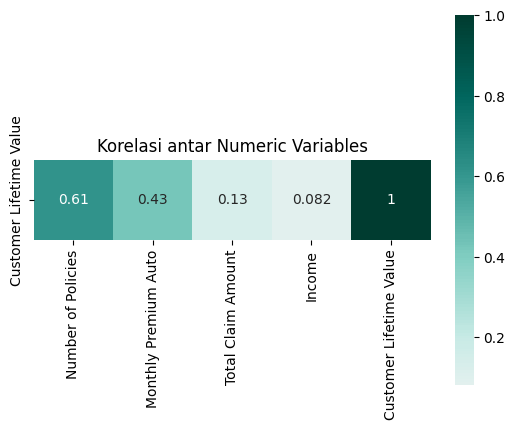

In [84]:
df_num = df[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']].corr(method='spearman')

sns.heatmap(df_num.loc[['Customer Lifetime Value']], annot=True, cmap='BrBG', center=0.0, square=True)
plt.title('Korelasi antar Numeric Variables')
plt.show()

Heatmap diatas menunjukkan nilai korelasi kolom numerikal terhadap target (Customer Lifetime Value). Dan dapat dilihat bahwa `Customer Lifetime Value` memiliki korelasi positif terkuat dengan feature  `Number of Policies` (0.61). Sedangkan feature `Income` menjadi feature yang berkorelasi terlemah dengan `Customer Lifetime Value` (0.082).

Untuk menambahkan pemahaman terkait dataset, saya juga menampilkan scatterplot feature numerical dengan CLV namun dibedakan berdasarkan hue dari feature `Coverage` untuk membantu pada saat memilih encoding yang tepat pada proses Data Reprocessing nanti.

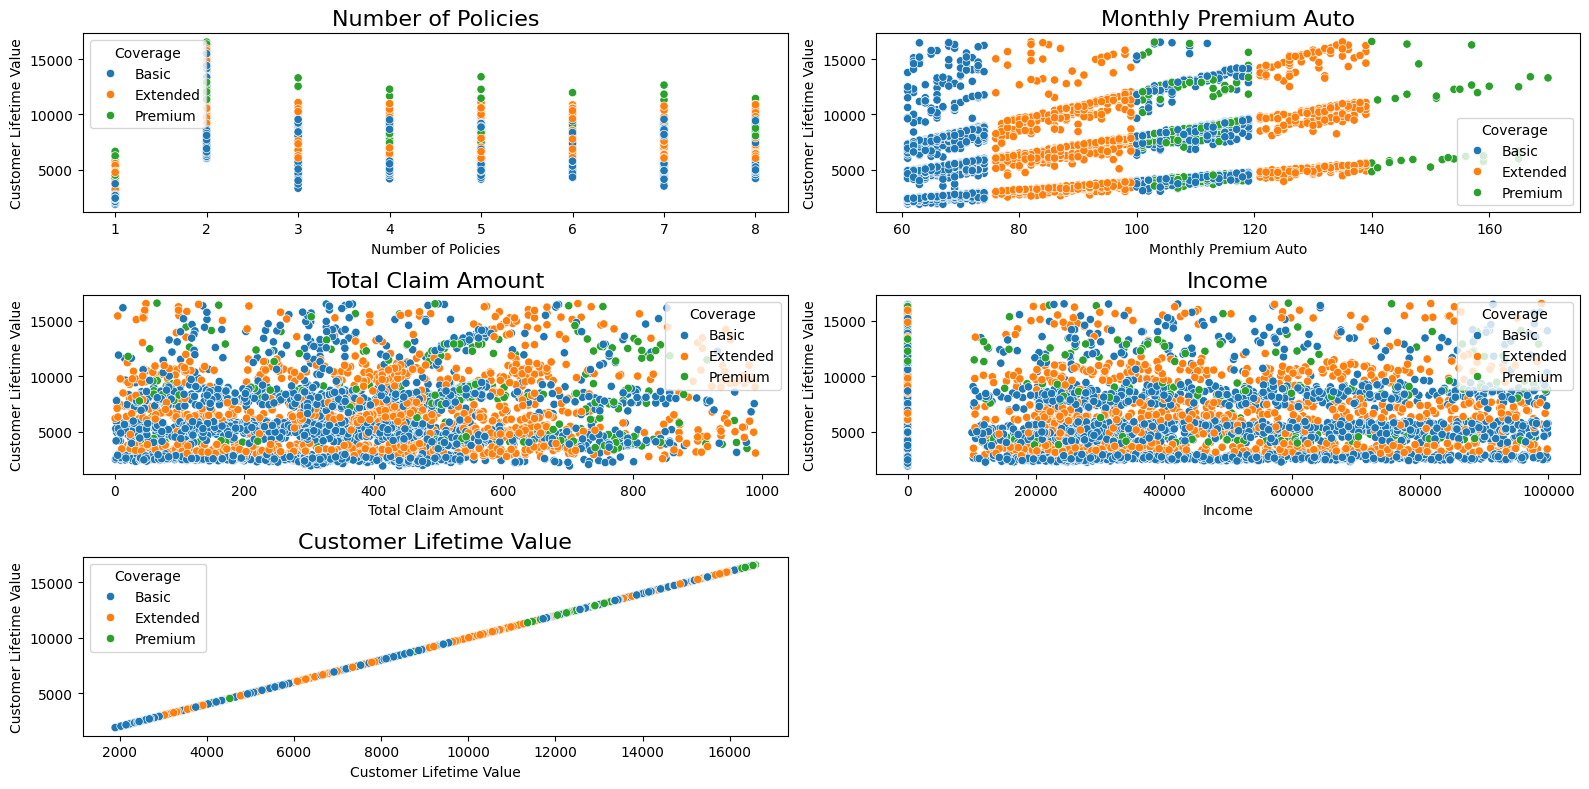

In [85]:
plt.figure(figsize=(16, 8))
num_subplot = 1
num_numerical_cols = len(numeric_columns)

num_subplot_rows = (num_numerical_cols + 1) // 2 
num_subplot_cols = min(num_numerical_cols, 2)

for i in numeric_columns:
    plt.subplot(num_subplot_rows, num_subplot_cols, num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'])
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot += 1

plt.show()


Berdasarkan scatterplot diatas, ditemukan terdapat perubahan pola yang signifikan pada `Monthly Premium Auto` vs `Customer Lifetime Value` yang dibedakan berdasarkan `Coverage`-nya. Hal diatas menunjukkan bahwa kemungkinan untuk masing-masing `Coverage` terdapat pembagian kelas lagi didalamnya (misal. Basic I, Basic II, Basic III, dst.) dimana rentang premi yang dibayarkan juga berbeda. Namun hal tersebut tidak terdapat dalam dataset.

## **Categorical Columns Correlation to CLV**

Untuk mendapat korelasi antara kolom kategorikal dengan target, saya menggunakan uji Kruskal-Wallis. Uji Kruskal-Wallis tidak benar-benar menunjukkan korelasi dalam pengertian statistik seperti yang dilakukan oleh koefisien korelasi, tapi Uji Kruskal-Walling ini berguna untuk memberi gambaran awal tentang pengaruh potensial kategori terhadap target, tetapi tidak memberikan ukuran korelasi langsung.

In [86]:
from scipy.stats import kruskal

results = {}

categorical_columns = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'Education', 'EmploymentStatus', 'Marital Status']

for col in categorical_columns:
    grouped_data = [df.loc[df[col] == category, 'Customer Lifetime Value'].values for category in df[col].unique()]
    
    stat, p_value = kruskal(*grouped_data)
    
    results[col] = {'Statistic': stat, 'P-Value': p_value}

print("Hasil Uji Kruskal-Wallis:")
for col, result in results.items():
    print(f"{col}: Statistic={result['Statistic']:.4f}, P-Value={result['P-Value']:.4f}")

    if result['P-Value'] < 0.05:
        print(f"   -> Kolom '{col}' memiliki hubungan signifikan dengan Customer Lifetime Value.\n")
    else:
        print(f"   -> Kolom '{col}' tidak memiliki hubungan signifikan dengan Customer Lifetime Value.\n")

Hasil Uji Kruskal-Wallis:
Vehicle Class: Statistic=414.0081, P-Value=0.0000
   -> Kolom 'Vehicle Class' memiliki hubungan signifikan dengan Customer Lifetime Value.

Coverage: Statistic=263.7910, P-Value=0.0000
   -> Kolom 'Coverage' memiliki hubungan signifikan dengan Customer Lifetime Value.

Renew Offer Type: Statistic=107.2318, P-Value=0.0000
   -> Kolom 'Renew Offer Type' memiliki hubungan signifikan dengan Customer Lifetime Value.

Education: Statistic=1.7579, P-Value=0.7802
   -> Kolom 'Education' tidak memiliki hubungan signifikan dengan Customer Lifetime Value.

EmploymentStatus: Statistic=31.3310, P-Value=0.0000
   -> Kolom 'EmploymentStatus' memiliki hubungan signifikan dengan Customer Lifetime Value.

Marital Status: Statistic=17.3734, P-Value=0.0002
   -> Kolom 'Marital Status' memiliki hubungan signifikan dengan Customer Lifetime Value.



# **Define X and y**

In [87]:
# Importing library for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

#Polynomial feature
from sklearn.preprocessing import PolynomialFeatures

from category_encoders import BinaryEncoder
import category_encoders as ce
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

In [88]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

# **Data Splitting**

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# **Data Preprocessing**

## Encoding

Encoding adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel categorical menjadi numerical dalam machine learning. Adapun untuk project ini saya menggunakan onehot encoding dan ordinal encoding. Penggunaan onehot encoding ini digunakan pada feature categorical nominal karena feature tersebut tidak memiliki banyak unique value dan tidak memiliki tingkatan atas masing-masing valuenya. Sedangkan untuk ordinal encoding  digunakan pada feature categorical ordinal dimana nilainya memiliki tingkatan. Berikut pembagian encoder yang digunakan:

- Onehot: `Vehicle Class`, `EmploymentStatus`, `Renew Offer type`, `Marital Status`
- Ordinal: `Coverage`, `Education`


In [90]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

## **Transformer**

In [91]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping), ['Coverage', 'Education']),
    ('robust', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}]),
                                 ['Coverage', 'Education']),
                                ('robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

# **Cross Validation**

Cross Validation adalah teknik yang digunakan dalam machine learning dan statistik untuk mengevaluasi kinerja model pada data yang tidak terlihat (unseen data). Teknik ini membagi dataset menjadi beberapa subset (folds) untuk memastikan bahwa model yang dibuat tidak terlalu cocok hanya pada data tertentu (overfitting) dan dapat bekerja baik pada data baru.

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_validate

In [93]:
linear = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state= 0)
forest = RandomForestRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(random_state=0)
gbr = GradientBoostingRegressor(random_state= 0)

list_model = [linear, knn, tree, forest, ada, xgb, gbr]

In [94]:
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Evaluation Metrics yang digunakan
scorer = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

for model in list_model:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator = pipe_model,
        X = X_train, 
        y = y_train,
        scoring= scorer,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

In [95]:
cvresult = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest','AdaBoost' , 'XGBoost', 'Gradient Boost'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

cvresult

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2796.198,43.772,-2078.282,31.109,-0.389,0.016
1,KNN,-2763.324,29.551,-1888.922,62.429,-0.359,0.027
2,Decision Tree,-1393.569,106.728,-499.594,53.348,-0.061,0.007
3,Random Forest,-1031.699,45.368,-402.160,31.438,-0.048,0.004
4,AdaBoost,-1241.244,25.111,-781.804,27.231,-0.114,0.004
5,XGBoost,-1122.220,33.266,-494.078,27.839,-0.073,0.005
6,Gradient Boost,-961.409,43.646,-403.068,21.153,-0.054,0.003


Berdasarkan cross validation diatas, diketahui bahwa terdapat perbedaan hasil antara nilai RMSE dan MAE dimana nilai RMSE cenderung lebih tinggi karena nilai residualnya dikuadratkan terlebih dahulu sebelum dirata-ratakan, sedangkan nilai residual MAE diabsolutkan sehingga lebih kecil. Nilai RMSE juga lebih tinggi karena RMSE memberikan bobot lebih besar pada nilai residual yang besar (sensitif kepada residual outlier). Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, Gradient Boost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu Gradient Boost dan RandomForest. 

In [96]:
# Benchmark 2 model terbaik
test_models = [forest, gbr]

nilai_rmse =[]
nilai_mae =[]
nilai_mape =[]

# Prediksi pada test set
for model in test_models:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    pipe_model.fit(X_train, y_train)
    yPred = pipe_model.predict(X_test)

    # Menghitung RMSE, MAE, dan MAPE
    nilai_rmse.append(np.sqrt(mean_squared_error(y_test, yPred)))
    nilai_mae.append(mean_absolute_error(y_test, yPred))
    nilai_mape.append(mean_absolute_percentage_error(y_test, yPred))

In [97]:
score_final_model = pd.DataFrame({
    'RMSE': nilai_rmse,
    'MAE': nilai_mae,
    'MAPE': nilai_mape},
    index=['forest', 'gbr']).round(3)

score_final_model

,RMSE,MAE,MAPE
forest,1001.965,400.994,0.049
gbr,961.372,403.418,0.053


Setelah diuji prediksi terhadap test, Gradient Boost menjadi model terbaik bila metrik RMSE yang dijadikan patokan. Namun di sini, saya memutuskan untuk menggunakan MAPE dan MAE sebagai patokan model terbaik karena MAPE lebih mudah diinterpretasi dan akan relevan dengan keputusan bisnis. Kemudian MAE dapat menunjukkan efek absolut dari kesalahan model, terutama pada nilai target yang besar, yang mungkin kurang terlihat jika hanya menggunakan MAPE.

Karena model akhir yang dipilih adalah Random Forest, kita perlu memahami terlebih dahulu cara kerja algoritma dari model Random Forest dalam memprediksi target dalam kasus regresi.

- Random Forest regresi bekerja dengan membangun banyak decision tree dari subset data yang dipilih secara acak (dengan pengembalian) dari dataset asli.
- Setiap tree dilatih untuk memprediksi nilai target (misalnya, Customer Lifetime Value) menggunakan subset fitur yang juga dipilih secara acak. 
- Setelah semua tree selesai dilatih, masing-masing tree memberikan prediksinya, dan hasil akhir adalah rata-rata dari semua prediksi tersebut. Proses ini membantu mengurangi overfitting, menangani hubungan yang kompleks antara variabel, dan memberikan hasil prediksi yang lebih stabil. Model ini cocok untuk tugas regresi karena menghasilkan nilai kontinu yang lebih akurat dengan menggabungkan kekuatan dari banyak decision tree.

# **Hyperparameter Tuning**

Hyperparameter tuning adalah proses memilih nilai optimal untuk hyperparameter dalam sebuah model machine learning untuk meningkatkan performa model. Hyperparameter adalah parameter yang harus ditentukan sebelum proses pelatihan model dimulai, berbeda dengan parameter model yang dipelajari dari data selama pelatihan.

In [98]:
model = RandomForestRegressor(random_state=0)

In [99]:
hyperparam = {
    'modeling__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'modeling__n_estimators' : range(100, 400, 50),
    'modeling__max_depth' : [None, 10, 20, 30, 40, 50, 60, 70],
    'modeling__min_samples_leaf' : range(1, 101, 5),
    'modeling__min_samples_split' : range(2, 101, 5),
    'preprocessing__robust' : [RobustScaler(), MinMaxScaler(), StandardScaler()]
}

scorer = ['neg_root_mean_squared_error',
          'neg_mean_absolute_percentage_error',
          'neg_mean_absolute_error']

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', model)
    ])

#define gridsearch
# gridsearch = GridSearchCV(
#     estimator = Pipe_model,
#     cv = 5,
#     scoring = scorer,
#     refit='neg_root_mean_squared_error',
#     n_jobs= -1,
#     param_grid= hyperparam   
# )

randomsearch = RandomizedSearchCV(
    estimator = Pipe_model,
    param_distributions = hyperparam,
    n_jobs = -1,
    cv = 5,
    scoring = scorer,
    n_iter = 200,
    random_state=0,
    refit='neg_mean_absolute_percentage_error'
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapp...
                                        'modeling__min_samples_leaf': range(1, 101, 5),
                                        'modeling__min_samples_split': range(2, 101, 5),
                                        'modeling__n_estimators': range(100, 400, 50),
                                        'preprocessing__robust': [RobustScaler(),
                                                                  MinMaxScaler(),
                                                                  StandardScaler()]},
                   random_state=0, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_absolute_error'])

In [100]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapp...
                                        'modeling__min_samples_leaf': range(1, 101, 5),
                                        'modeling__min_samples_split': range(2, 101, 5),
                                        'modeling__n_estimators': range(100, 400, 50),
                                        'preprocessing__robust': [RobustScaler(),
                                                                  MinMaxScaler(),
                                                                  StandardScaler()]},
                   random_state=0, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_absolute_error'])

In [101]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_neg_mean_absolute_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__robust,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
35,26.889655,2.182674,0.035188,0.002459,MinMaxScaler(),100,17,16,20,absolute_error,...,0.001362,1,-339.886187,-294.719109,-333.760969,-341.923025,-346.040167,-331.265891,18.697892,1
105,83.544913,0.309017,0.084003,0.002530,StandardScaler(),250,27,6,60,absolute_error,...,0.001790,2,-353.576113,-304.920536,-344.460403,-339.355358,-345.700854,-337.602653,16.964397,2
141,120.539297,0.835359,0.115737,0.004274,RobustScaler(),350,32,6,70,absolute_error,...,0.001605,3,-352.891487,-303.796801,-344.471859,-344.609911,-351.066838,-339.367379,18.102954,3
107,108.790086,1.239104,0.132070,0.046226,RobustScaler(),350,37,6,30,absolute_error,...,0.001561,4,-354.238536,-304.265885,-346.080752,-349.909956,-353.784281,-341.655882,18.926924,4
24,38.123103,4.848539,0.046227,0.011462,StandardScaler(),150,12,6,60,absolute_error,...,0.002097,5,-363.947418,-317.063533,-349.593742,-335.509581,-349.376878,-343.098230,15.822103,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.454046,0.266341,0.042908,0.012125,MinMaxScaler(),150,67,96,40,friedman_mse,...,0.001995,196,-579.402810,-526.107032,-559.981692,-555.827637,-560.024522,-556.268739,17.163917,196
132,1.437561,0.031380,0.047863,0.002275,StandardScaler(),150,77,96,30,friedman_mse,...,0.001966,198,-579.402810,-526.056927,-559.981692,-555.827637,-560.917436,-556.437300,17.224330,197
54,1.588609,0.221936,0.038494,0.002460,MinMaxScaler(),150,2,91,50,poisson,...,0.002360,194,-584.974499,-523.275874,-562.434151,-550.952306,-564.753573,-557.278081,20.227334,198
123,2.906270,0.129235,0.080180,0.020878,RobustScaler(),200,32,96,None,poisson,...,0.002285,199,-591.275529,-526.602330,-566.903170,-557.547153,-573.297248,-563.125086,21.331757,199


In [102]:
print('Gradient Boost (by RandomizedSearchCV')
print('Best_score:', randomsearch.best_score_)
print('Best_params:', randomsearch.best_params_)

Gradient Boost (by RandomizedSearchCV
Best_score: -0.038195143025724146
Best_params: {'preprocessing__robust': MinMaxScaler(), 'modeling__n_estimators': 100, 'modeling__min_samples_split': 17, 'modeling__min_samples_leaf': 16, 'modeling__max_depth': 20, 'modeling__criterion': 'absolute_error'}


Setelah dilakukannya hyperparameter tuning menggunakan RandomizedSearch, didapat kombinasi parameter Random Forest terbaik untuk prediksi sebagai berikut.

Best parameter Randomized Search: 
- scaler: MinMaxScaler()
- n_estimators: 100
- min_samples_split: 17
- min_samples_leaf: 16
- max_depth: 20
- criterion: 'absolute_error'

# **Predict to Test**

In [103]:
# define model
model = forest

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', model)
    ])

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_before = Pipe_model.predict(X_test)

# score
rmse_before_tuning = np.sqrt(mean_squared_error(y_test, y_pred_before))
mae_before_tuning = mean_absolute_error(y_test, y_pred_before)
mape_before_tuning = mean_absolute_percentage_error(y_test, y_pred_before)

score_before_tuning = pd.DataFrame({'RMSE': rmse_before_tuning, 'MAE': mae_before_tuning, 'MAPE': mape_before_tuning}, index= ['forest']).round(3)
score_before_tuning

,RMSE,MAE,MAPE
forest,1001.965,400.994,0.049


In [104]:
# define model
best_model = randomsearch.best_estimator_

# fitting to Train Set
best_model.fit(X_train, y_train)

# Predict to Test set
y_pred_after = best_model.predict(X_test)

# score
rmse_after_tuning = np.sqrt(mean_squared_error(y_test, y_pred_after))
mae_after_tuning = mean_absolute_error(y_test, y_pred_after)
mape_after_tuning = mean_absolute_percentage_error(y_test, y_pred_after)

score_after_tuning = pd.DataFrame({'RMSE': rmse_after_tuning, 'MAE': mae_after_tuning, 'MAPE': mape_after_tuning}, index= ['forest']).round(3)
score_after_tuning

,RMSE,MAE,MAPE
forest,1020.33,329.539,0.038


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 1001.965, 400.994, 0.049
- RMSE, MAE & MAPE setelah tuning: 1020.33, 329.539, 0.038

In [105]:
df_result = df[['Customer Lifetime Value']]
df_result['yPred'] = best_model.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,10005.731743,77.755137
1,4943.386117,4935.094958,8.291159
2,11981.984810,7296.539625,4685.445185
3,4550.856045,4524.047031,26.809014
4,2372.155492,2357.359590,14.795902
...,...,...,...
5660,4936.888359,5018.321826,-81.433467
5663,8114.409136,8090.607889,23.801247
5664,2442.216651,2608.127659,-165.911008
5665,12904.943360,12948.033755,-43.090395


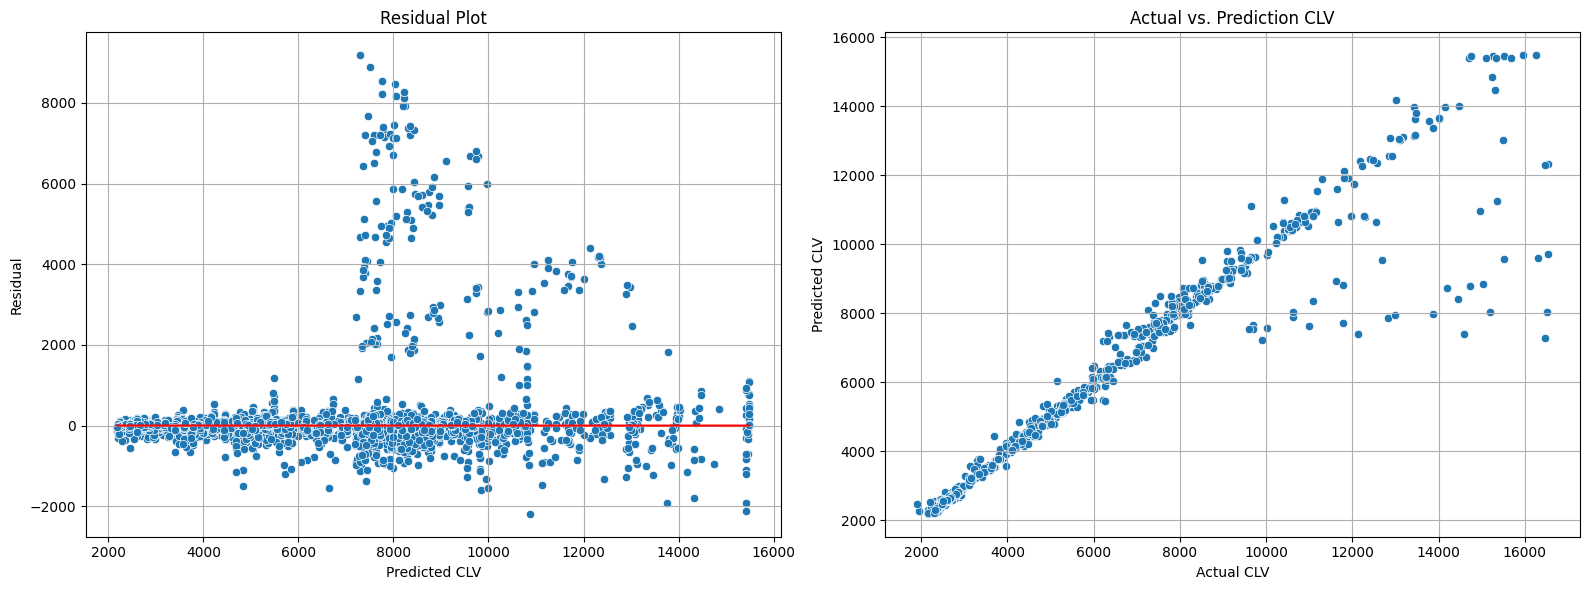

In [106]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_after).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.grid()
plt.tight_layout();

Residual plot diatas menunjukkan bahwa prediksi model ini cukup akurat untuk memprediksi CLV < 8000 karena terlihat dengan banyaknya nilai error yang mendekati nilai 0. Pada plot Actual vs Predicted CLV, hasil prediksi juga menunjukkan hasil cukup akurat karena plotnya membentuk satu garis lurus dengan terdapat beberapa outlier mulai dari rentang ± 9000.

# **Feature Importances**

Feature Importance adalah teknik dalam machine learning yang digunakan untuk mengidentifikasi dan mengukur seberapa besar kontribusi atau pengaruh setiap fitur (kolom atau variabel independen) terhadap hasil prediksi model. Dengan mengetahui fitur mana yang paling penting, kita dapat memahami pola yang dipelajari model dari data, mengurangi kompleksitas model, atau memilih fitur yang relevan untuk analisis lebih lanjut.

In [107]:
transformer.named_transformers_['robust'].get_feature_names_out()

array(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'], dtype=object)

In [108]:
# Mengambil nama features dari onehot encoder
f_onehot = transformer.named_transformers_['onehot'].get_feature_names_out()

# Mengambil nama features dari ordinal encoder
f_ordinal = transformer.transformers[1][1].cols

# Mengambil nama feature dari robust
f_robust = transformer.named_transformers_['robust'].get_feature_names_out()

# Menggabungkan nama-nama feature
all_feat = list(f_onehot) + list(f_ordinal) + list(f_robust)

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : Pipe_model['modeling'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
14,Number of Policies,0.695351
15,Monthly Premium Auto,0.226423
16,Total Claim Amount,0.024459
17,Income,0.021570
13,Education,0.006567
12,Coverage,0.003724
7,Renew Offer Type_Offer2,0.003191
2,Vehicle Class_Two-Door Car,0.003049
3,EmploymentStatus_Employed,0.002806
10,Marital Status_Married,0.002748


Text(0.5, 1.0, 'Feature Importance')

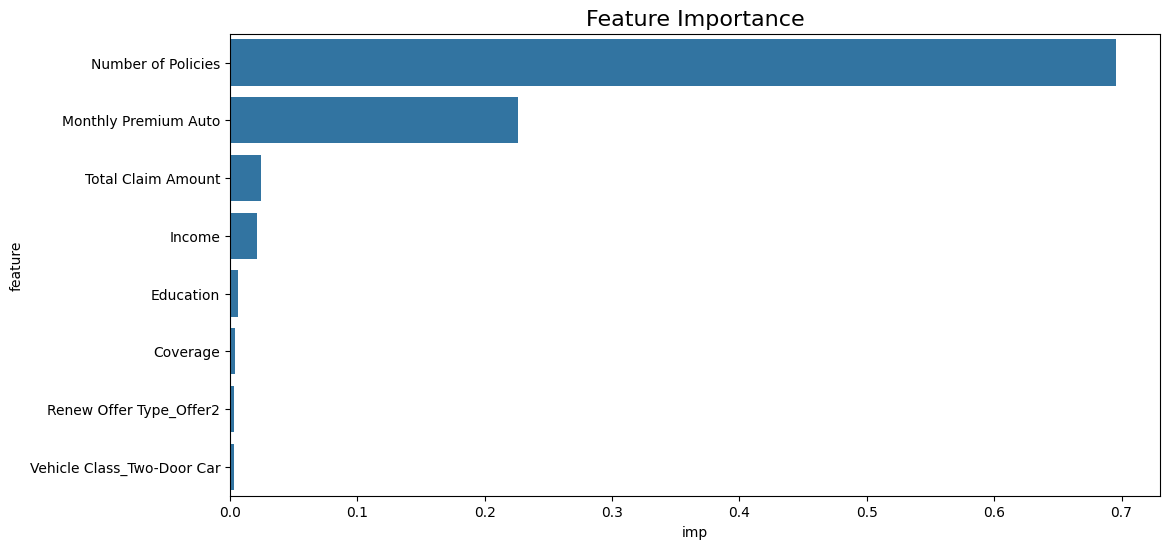

In [109]:
# Bar feature importance
plt.figure(figsize=(12,6))
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')
plt.title('Feature Importance', size=16)

Setelah mendapat nilai feature importance dari masing-masing feature, dapat diketahui feature mana saja yang paling mempengaruhi target. Dalam hal ini, bila asumsi threshold = 0.01, maka bisa kita lakukan Re-Modelling dengan feature yang memiliki nilai feature importance lebih dari 0.01 (threshold), yaitu `Income`, `Total Claim Amount`, `Monthly Premium Auto`, dan `Number of Policies`. 

# Re-Modelling

In [110]:
X = df[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]
y = df['Customer Lifetime Value']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [112]:
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

In [113]:
hyperparam = {
    'modeling__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'modeling__n_estimators' : range(100, 400, 50),
    'modeling__max_depth' : [None, 10, 20, 30, 40, 50, 60, 70],
    'modeling__min_samples_leaf' : range(1, 101, 5),
    'modeling__min_samples_split' : range(2, 101, 5),
    'preprocessing__robust' : [RobustScaler(), MinMaxScaler(), StandardScaler()]
}

scorer = ['neg_root_mean_squared_error',
          'neg_mean_absolute_percentage_error',
          'neg_mean_absolute_error']

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', model)
    ])

randomsearch = RandomizedSearchCV(
    estimator = Pipe_model,
    param_distributions = hyperparam,
    n_jobs = -1,
    cv = 5,
    scoring = scorer,
    n_iter = 200,
    random_state=0,
    refit='neg_mean_absolute_percentage_error'
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['Number '
                                                                                'of '
                                                                                'Policies',
                                                                                'Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Income'])])),
                                             ('modeling',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'modeling__criterion'...
                                        'modeling__min_samples_leaf': range(1, 101, 5),
                                        'modeling__min_samples_split': range(2, 101, 5),
                                        'modeling__n_estimators': range(100, 400, 50),
                                        'preprocessing__robust': [RobustScaler(),
                                                                  MinMaxScaler(),
                                                                  StandardScaler()]},
                   random_state=0, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_absolute_error'])

In [114]:
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['Number '
                                                                                'of '
                                                                                'Policies',
                                                                                'Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Claim '
                                                                                'Amount',
                                                                                'Income'])])),
                                             ('modeling',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'modeling__criterion'...
                                        'modeling__min_samples_leaf': range(1, 101, 5),
                                        'modeling__min_samples_split': range(2, 101, 5),
                                        'modeling__n_estimators': range(100, 400, 50),
                                        'preprocessing__robust': [RobustScaler(),
                                                                  MinMaxScaler(),
                                                                  StandardScaler()]},
                   random_state=0, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_absolute_error'])

In [115]:
# define model
best_model = randomsearch.best_estimator_

# fitting to Train Set
best_model.fit(X_train, y_train)

# Predict to Test set
y_pred = best_model.predict(X_test)

# score
rmse = np.sqrt(mean_squared_error(y_test, y_pred_after))
mae = mean_absolute_error(y_test, y_pred_after)
mape = mean_absolute_percentage_error(y_test, y_pred_after)

score = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'MAPE': mape}, index= ['forest']).round(3)
score

,RMSE,MAE,MAPE
forest,1020.33,329.539,0.038


In [116]:
df_result = df[['Customer Lifetime Value']]
df_result['yPred'] = best_model.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,9994.974892,88.511988
1,4943.386117,4931.856734,11.529383
2,11981.984810,7376.501625,4605.483185
3,4550.856045,4535.723825,15.132220
4,2372.155492,2367.923355,4.232137
...,...,...,...
5660,4936.888359,5230.031971,-293.143612
5663,8114.409136,8073.018542,41.390594
5664,2442.216651,2617.259322,-175.042671
5665,12904.943360,12959.616213,-54.672853


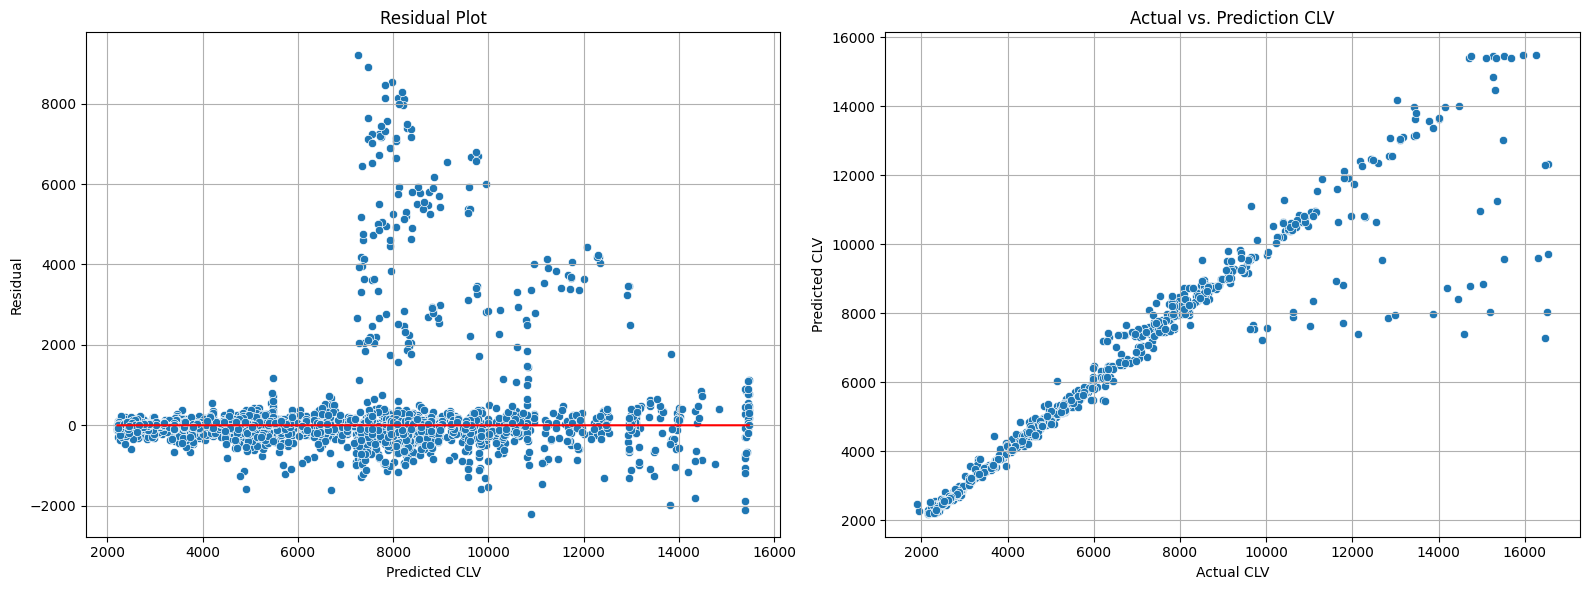

In [117]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='r')
plt.grid()

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_after).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.grid()
plt.tight_layout();

# **Conclusion**

Pada modeling yang sudah dilakukan, feature `Number of Policies` dan `Monthly Premium Auto` menjadi feature yang paling berpengaruh terhadap `Customer Lifetime Value`. Hal ini selaras dengan asumsi diawal bahwa kedua feature tersebut pun memiliki korelasi positif terkuat dengan `Customer Lifetime Value`.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, dan MAPE. Jika ditinjau dari nilai MAE (karena lebih mudah diinterpretasikan) yang dihasilkan setelah dilakukannya hyperparameter tuning yaitu 329.539, kita dapat menyimpulkan bahwa apabila kemudian hari model yang sudah dibangun akan memperkirakan CLV perusahaan asuransi mobil pada rentang nilai sesuai dengan limitasi model, maka perkiraan nilai CLV dapat meleset ± 329.539 dari nilai CLV yang seharusnya. Atau apabila dengan nilai MAPE, maka perkiraan nilai CLV dapat meleset ± 3.8% dari aktual nilai CLV.

Namun hal ini tidak menutup kemungkinan prediksinya meleset lebih jauh karena terdapat variance yang tidak seragam pada residual plot (estimasi pada CLV > 8000). Bias yang dihasilkan dari model ini dapat dikarenakan oleh kurangnya feature dan data pada dataset yang bisa lebih merepresentasikan nilai CLV itu sendiri.

# **Recommendation**

**Untuk Modeling Machine Learning**

1. Mengecek prediksi mana saja yang memiliki error yang tinggi (baik yang overprediction / underprediction), kemudian dieksplorasi lebih lanjut untuk feature apa saja yang mengakibatkan error tinggi.
2. Jika memungkinkan, menambahkan feature-feature yang berhubungan dengan prediksi CLV seperti periode lamanya menjadi customer asuransi mobil, klasifikasi dari coverage asuransi (misal. Basic I, Basic II, Basic III, dll), wilayah tempat tinggal, dan lainnya.
2. Penambahan data customer agar machine learning dapat memprediksi CLV lebih baik lagi.
3. Model yang sudah dibangun dapat dimanfaatkan untuk pengembangan model selanjutnya seperti mengeksplore penggunaan unsupervised learning (clustering) untuk dapat melakukan segmentasi customer yang profitable dan unprofitable agar penentuan strategi marketing lebih baik lagi.

**Untuk Bisnis**

1. Sehubungan dengan `Number of Policies` dan `Monthly Premium Auto` menjadi feature yang paling berpengaruh dalam memprediksi CLV, maka disarankan untuk dapat membuat personalized offer kepada customer agar dapat lebih menjawab kebutuhan customer berdasarkan jumlah polis dan biaya premi yang dibayarkan. Personalized offer ini akan menguntungkan karena budget marketing yang akan digunakan pun juga lebih personalized sehingga menghindari adanya membayar lebih untuk low-value customer dan kehilangan high-value customer.
2. Dengan mengetahui hasil prediksi CLV dari machine learning dn segmen berdasarkan hasil prediksi CLV, maka perusahaan disarankan untuk dapat menyusun strategi pemasaran yang tepat sasaran, seperti:

    - High CLV: Fokus pada retensi dengan program loyalitas.
    - Medium CLV: Upselling dan cross-selling.
    - Low CLV: Strategi pemasaran berbiaya rendah.


---

**Save Model**

In [ ]:
# import pickle

# model = randomsearch.best_estimator_
# model

# Fit
# model.fit(X, y)

# Save with Pickle
# pickle.dump(model, open('model_randomfores_CLV.sav', 'wb'))

In [ ]:
# Load model
# file_model = 'model_randomforest_CLV.sav'
# model_loaded = pickle.load(open(file_model, 'rb'))